### Thanks for joining me for a presentation on ... 

# <p style='text-align: center;'> Graph Convolutional Networks </p>

### Your Presenter: 

# <p style='text-align: center;'> Christian McDaniel </p>

### <p style='text-align: center;'> Data Scientist & Software Engineer, </p>
### <p style='text-align: center;'>  NCR Innovation Lab </p>

+ Got my Master's in Artificial Intelligence in August 2019
+ Conducted my thesis research under Dr. Shannon Quinn on deep learning-based multi-modal neuroimaging research for Parkinson's Disease
+ Currently work on Computer Vision-based applications to Retail, Finance, and Hospitality at NCR

# Graph Convolutional Networks

### Background

+ Graph Convolutional Networks are both simple and complex
+ They borrow from multiple domains to arrive at an elegant analysis algorithm
    + Deep Learning - Convolutional Neural Networks
    + Spectral Graph Clustering - Graph Laplacian 
    + Signal Processing - Fourier Transform

# Graph Convolutional Networks

### Background

+ Imagine a dataset: 
    + Made up many **points**
    + Each point can be described by `p` **features** and falls into one of `c` **classes**.
    + These points are **interconnected**. 
    
![](https://deepcarbon.net/sites/default/files/2018-04/DS%20Hero_0.jpg)

# Graph Convolutional Networks

### Background

+ I.e., the points of the dataset make up the nodes of a **graph**
+ We could just plug in these point to a traditional classification algorithm
+ OR we could use the connections between the nodes to cluster the datapoints
+ But neither are sufficient, so we'd like to utilize both the features of each node AND the connections between them

Word Embedding | Molecular Structure | Traffic Routes | Neuronal Networks
:-------------:|:--------------------:|:--------------:|:-----------------:
<img src="https://journals.plos.org/plosone/article/figure/image?size=medium&id=info:doi/10.1371/journal.pone.0192545.g001" width=1000 /> | ![](https://www.researchgate.net/profile/Zichun_Zhou/publication/320259580/figure/fig1/AS:546779441242112@1507373785967/a-Molecular-structure-and-b-optimized-molecular-geometry-of-NITI-2-Ethylhexyl-groups.png) | ![](https://cdn.siasat.com/wp-content/uploads/2019/09/IMG-20190911-WA0000.jpg) | ![](https://www.nitrc.org/project/screenshot.php?group_id=504&screenshot_id=381)

# Graph Convolutional Networks

### Background - Convolutional Neural Networks

_ | _
:-----|:------:
<p style='text-align: left;'>+ Great success with computer vision-based applications<br><br>+ Some advantages of CNN's:<br>&nbsp;&nbsp;&nbsp;&nbsp;+ Computational efficiency (∼ O(V + E))<br>&nbsp;&nbsp;&nbsp;&nbsp;+ 􏰀Fixed number of parameters (independent of input size)<br>&nbsp;&nbsp;&nbsp;&nbsp;+ Localisation: acts on a local neighborhood<br>&nbsp;&nbsp;&nbsp;&nbsp;+ Learns the importance of different neighbors<br><br>+ Images have highly regular connectivity pattern<br>&nbsp;&nbsp;&nbsp;&nbsp;+ each pixel is "connected" to its eight neighboring pixels<br>&nbsp;&nbsp;&nbsp;&nbsp;+ Convolving a kernel matrix across the "nodes" is trivial </p> | ![](https://miro.medium.com/max/1500/1*c4WANGmOEPsMUKVShMh92A.png)

In [2]:
import cv2
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.lines as mlines
try:
    from PIL import Image
except ImportError:
    import Image
%matplotlib inline

# Open image file
image = Image.open('/Users/cm185255/Documents/IMG_0001.JPG')
image = np.rot90(image,k=3)
my_dpi=300.

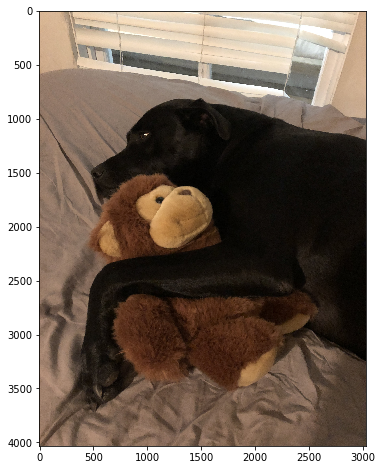

In [5]:
fig=plt.figure(figsize=(6,8))
ax=fig.add_subplot(111)

ax.imshow(image)        
plt.show()

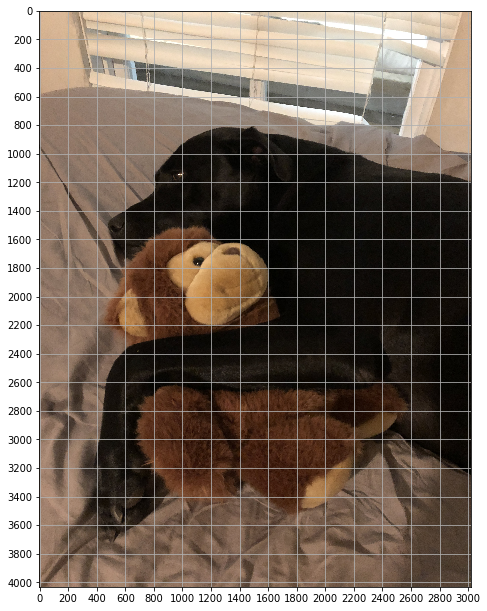

In [7]:
fig=plt.figure(figsize=(6,8))
ax=fig.add_subplot(111)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
loc = plticker.MultipleLocator(base=200)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.grid(which='major', axis='both', linestyle='-')
ax.imshow(image)
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(200)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(200)))
plt.show()

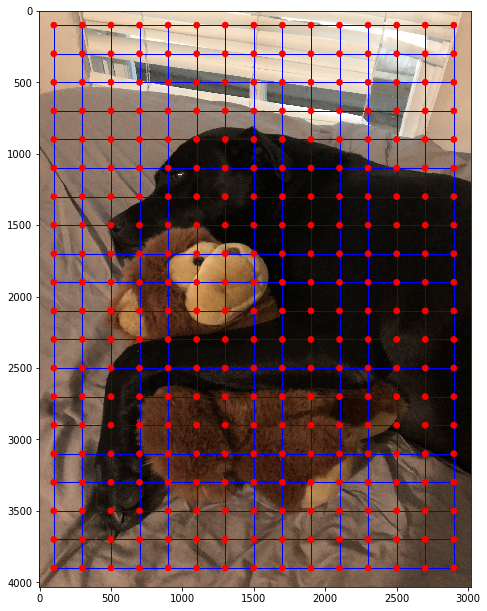

In [12]:
fig=plt.figure(figsize=(6,8))
ax=fig.add_subplot(111)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
ax.imshow(image)
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(200)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(200)))
nodes = list()
for j in range(ny):
    y=200/2+j*200
    nodes.append(list())
    for i in range(nx):
        x=200/2.+float(i)*200
        nodes[j].append([x,y])
for j in range(ny):
    for i in range(nx-1):
        l = mlines.Line2D([nodes[j][i][0],nodes[j][i+1][0]], [nodes[j][i][1],nodes[j][i][1]],linewidth=1,color='b')
        ax.add_line(l)
for i in range(nx):
    for j in range(ny-1):
        l = mlines.Line2D([nodes[j][i][0],nodes[j][i][0]], [nodes[j][i][1],nodes[j+1][i][1]],linewidth=1,color='b')
        ax.add_line(l)
for j in range(ny):
    for i in range(nx):
        circle = plt.Circle((nodes[j][i][0],nodes[j][i][1]), 20, color='r',zorder=10)
        ax.add_artist(circle)
plt.show()

# Images as Well-Behaved Graphs 

<img src="./pygcn/pygcn/dexter.png" width=400 /> 

# Images as Well-Behaved Graphs 

_ | _
:--:|:---:
<img src="./pygcn/pygcn/dexter.png" width=400 /> | <img src="./pygcn/pygcn/dexter_grid.png" width=400 />

# Images as Well-Behaved Graphs 

_ | _ | _
:--:|:---:|:-----:
<img src="./pygcn/pygcn/dexter.png" width=400 /> | <img src="./pygcn/pygcn/dexter_grid.png" width=400 /> | <img src="./pygcn/pygcn/dexter_graph.png" width=400 />

# Graph Convolutional Networks

+ Generalizing the convolution operation for arbitrary graph structures is much more tricky
+ We will use some *very* convenient (and awesome) rules from Signal Processing and Spectral Graph Theory
+ Next we'll discuss recent advances improving performance and computational efficiency 
    + (Semi-Supervised Classification with Graph Convolutional Networks, Kipf & Welling 2016)

# Graph Convolutional Networks

### Before we learn the ituitions, let's first look at what a simple GCN may look like: 

#### The graph-based convolution:
<p style='text-align: center;'> $Z = \tilde{D}^{\frac{-1}{2}}\tilde{A}\tilde{D}^{\frac{-1}{2}}X\Theta$ </p>

#### Add in a Nonlinear Activation
+ Graph structure is encoded directly into the neural network model by incorporating the adjacency matrix: $f(X,A)$
+ We can do so by wrapping the above equation in a nonlinear activation function: 
<p style='text-align: center;'> $H^{(l+1)} = \sigma(\tilde{D}^{\frac{-1}{2}}\tilde{A}\tilde{D}^{\frac{-1}{2}}H^{l}W^{l})$ </p>
+ Where $W^{l}$ is a layer-specific trainable weight matrix, $\sigma(\cdot)$ is an activation function, $H^{l} \in \mathbb{R}^{N x F^{l}}$ is the matrix of activations from the $l^{th}$ layer, and $H^{0}=X$
+ A two-layer Graph Convolutional Network may look something like 
<p style='text-align: center;'> $Z = f(X,A) = \textrm{softmax}(\hat{A}   \textrm{ReLU}(\hat{A}XW^{0})W^{1})$ </p>
+ Where $\hat{A}$ is the precalculated $D^{\frac{-1}{2}}AD^{\frac{-1}{2}}$

#### So... Where did this implimentation come from??

# 1. Generalizing the Convolution

+ A **convolution operation** combines one function $f$ with another function $g$ such that the first function is transformed by the other
 
![](https://media1.giphy.com/media/CNgNBnSAobcBO/giphy.gif)

+ In Convolutional Neural Networks, the second function $g$ is *learned* for a given data set so that the transformations on $f$ are meaningful w.r.t. some class values
    + e.g., a set of pixels showing a dog, $f_{d}$ may be transformed to values near $0$ 
    + while a set of pixels showing a cat, $f_{c}$ may be transformed to values near $1$
+ Let's see how we might do this for our graph-based data...

# Graph Convolutional Networks

#### Signal Processing
+ With the **nodes** of the graph representing individual examples from the dataset,
+ And some data at each node
+ E.g., 
    + scalar intensity values at each pixel of an image
    + feature vectors  for higher dimensional data
+ We can consider the data values as **signals** on each node    

![](http://www.vincent-gripon.com/330---Fun%20stuff---En%20vrac/000---Graph%20Signal%20Processing---Traitement%20du%20signal%20sur%20graphes/Capture.png)

# Graph Convolutional Networks

#### Signal Processing
+ With the **nodes** of the graph representing individual examples from the dataset,
+ And some data at each node
    + scalar intensity values at each pixel of an image
    + feature vectors  for higher dimensional data
+ We can consider the data values as **signals** on each node 

![](http://www.vincent-gripon.com/330---Fun%20stuff---En%20vrac/000---Graph%20Signal%20Processing---Traitement%20du%20signal%20sur%20graphes/Capture.png)

+ Intuitively, by commuting over the nodes of the graph, we could learn a function $g$ that transforms the values at each node in a meaningful way 
+ How might we define the "filter" $g$...?

# Graph Convolutional Networks

#### Signal Processing
+ With the **nodes** of the graph representing individual examples from the dataset,
+ And some data at each node
    + scalar intensity values at each pixel of an image
    + feature vectors  for higher dimensional data
+ We can consider the data values as **signals** on each node 

![](http://www.vincent-gripon.com/330---Fun%20stuff---En%20vrac/000---Graph%20Signal%20Processing---Traitement%20du%20signal%20sur%20graphes/Capture.png)

+ The changing of the signals across the edges of the graph resemble the fluctuation of a signal over time
+ Borrowing from signal processing, these oscillations could be characterized by their component frequencies, via the **Fourier transform**
+ It just so happens that graphs have their own version of the FT... 

# Graph Convolutional Networks

#### From Spectral Graph Theory ... The Normalized Graph Laplacian

_ | _ 
:----:|:-----:
<p style='text-align: center;'> $L = I - D^{\frac{-1}{2}} A D^{\frac{-1}{2}}$ </p><br>+ Where $I$ is the diagonal **identity matrix**<br>$D$ is the diagonal **degree matrix**<br> and $A$ is the weighted **adjacency matrix**<br> | 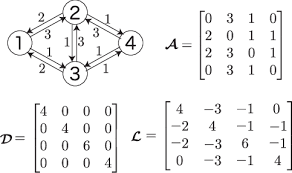



# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
+ The Normalized Graph Laplacian $L$ is a real symmetric positive semidefinite matrix
    + $z^{T}Lz \geq 0$ for all columns z
    + it has a complete set of orthonormal eigenvectors $\{u_{l}\}_{l=0}^{n−1} \in \mathbb{R}^{n}$ a.k.a. the **graph Fourier modes**
    + and it has the associated ordered real nonnegative eigenvalues $\{λ_{l}\}_{l=0}^{n−1}$, the frequencies of the graph
+ $L$ is diagonalized in the Fourier basis $U = [u_{0}, u_{1}, ..., u{n-1}] \in \mathbb{R}^{nxn}$ such that 
<p style='text-align: center;'> $L = U^{T} \Lambda U$ </p>
+ Where $\Lambda = \textrm{diag}([\lambda_{0}, \lambda_{1}, ..., \lambda_{n-1}] \in \mathbb{R}^{nxn})$

#### I.e.,
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>



# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform
+ The **Fourier transform** in the graph domain, where eigenvectors denote Fourier modes and eigenvalues denote frequencies of the graph is defined
<p style='text-align: center;'> $\hat{x} = U^{T}x \in \mathbb{R}^{n}$ </p>
+ As on Euclidean spaces, this transform enables the formulation of fundamental operations.
+ E.g., the **convolution operation** becomes multiplication, and we can define a **convolution** of a data vector $x$ with a filter $g_{\Theta}$ as 
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x$ </p>


# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x$ </p>

+ By combining the filters $g_{\Theta}$ with the eigenvalue matrix $\Lambda$, we redefine the task of learning the filter $g$ as learning the **Fourier coefficients** that define the Fourier function of our graph
<p style='text-align: center;'> $g_{\Theta} \ast x = g_{\Theta}(U \Lambda U^{T})x = U\hat{G}U^{T}x$ </p>
+ Where $\hat{G} = g_{\Theta}(\Lambda)$ is a diagonal matrix of spectral filter coefficients 



# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x$ </p>

#### Signal Processing
<p style='text-align: center;'> $g_{\Theta} \ast x = g_{\Theta}(U \Lambda U^{T})x = U\hat{G}U^{T}x$ </p>

+ As computing the eigenspectrum of a matrix can be computationally exepensive, we can approximate the Fourier coefficients using a Kth order Chebychev Polynomial 
<p style='text-align: center;'> $g_{\Theta}\prime \approx \sum^{K}_{k=0}\Theta\prime_{k}T_{k}(\tilde{\Lambda})$ </p>
+ Where rescaled $\tilde{\Lambda} = \frac{2}{\lambda_{max}}\Lambda - I$

# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x$ </p>

#### Signal Processing
<p style='text-align: center;'> $g_{\Theta} \ast x = g_{\Theta}(U \Lambda U^{T})x = U\hat{G}U^{T}x$ </p>
<p style='text-align: center;'> $g_{\Theta}^{\prime} \approx \sum^{K}_{k=0}\Theta^{\prime}_{k}T_{k}(\tilde{\Lambda})$ </p>

+ This lets us define 
<p style='text-align: center;'> $g_{\Theta} \ast x \approx \sum^{K}_{k=0}\Theta^{\prime}_{k}T_{k}(\tilde{L})x$ </p>
+ with $\tilde{L} = \frac{2}{\lambda_{max}}L - I$
+ The convolution is now $K$-localized, operating only on the nodes a distance of $K$ away from any given node

# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform and Signal Processing
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x = U\hat{G}U^{T}x$ </p>

<p style='text-align: center;'> $g_{\Theta} \ast x \approx \sum^{K}_{k=0}\Theta^{\prime}_{k}T_{k}(\tilde{L})x$ </p>


# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform and Signal Processing
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x = U\hat{G}U^{T}x$ </p>

<p style='text-align: center;'> $g_{\Theta} \ast x \approx \sum^{K}_{k=0}\Theta^{\prime}_{k}T_{k}(\tilde{L})x$ </p>

#### Subsequent Computational Advancements
1) In moving toward multi-layer networks, we can remove the explicit Chebychev parameterization by limiting the layer-wise convolution operation to $K=1$
+ This makes the function linear w.r.t. $L$
+ Prevents overfitting on local neighborhood structures 
+ Allows deeper models with the same computation, improving modeling capacity 

# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform and Signal Processing
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x = U\hat{G}U^{T}x$ </p>

<p style='text-align: center;'> $g_{\Theta} \ast x \approx \sum^{K}_{k=0}\Theta^{\prime}_{k}T_{k}(\tilde{L})x$ </p>

#### Subsequent Computational Advancements
1) $K=1$

2) When calculating the rescaled $\tilde{\Lambda}$ and $\tilde{L}$, we can approximate $\lambda_{max} \approx 2$, expecting the neural network paramaters to adapt accordingly during training. 
<p style='text-align: center;'> $\tilde{L} = \frac{2}{\lambda_{max}}L - I$, where $L = I - D^{-1/2} A D^{-1/2} \rightarrow \tilde{L} \approx L - I = D^{\frac{-1}{2}}AD^{\frac{-1}{2}}$ </p>
<p style='text-align: center;'> $g_{\Theta} \ast x \approx \theta^{\prime}_{0}x + \theta^{\prime}_{1}(L - I)x = \theta^{\prime}_{0}x + \theta^{\prime}_{1}D^{\frac{-1}{2}}AD^{\frac{-1}{2}}x$ </p>
+ with two free parameters $\lambda^{\prime}_{0}$ and $\lambda^{\prime}_{1}$

# Graph Convolutional Networks

#### The Normalized Graph Laplacian in the Spectral Domain
<p style='text-align: center;'> $L = I - D^{-1/2} A D^{-1/2} = U^{T} \Lambda U$ </p>

#### The Graph Fourier Transform and Signal Processing
<p style='text-align: center;'> $g_{\Theta} \ast x = U ((U^{T}g_{\Theta}) \bigodot (U^{T}x)) = g_{\Theta}(U \Lambda U^{T})x = U\hat{G}U^{T}x$ </p>

<p style='text-align: center;'> $g_{\Theta} \ast x \approx \sum^{K}_{k=0}\Theta^{\prime}_{k}T_{k}(\tilde{L})x$ </p>

#### Subsequent Computational Advancements
1) $K=1$

2) $g_{\Theta} \ast x \approx \theta^{\prime}_{0}x + \theta^{\prime}_{1}D^{\frac{-1}{2}}AD^{\frac{-1}{2}}x$

3) We can further constrain the problem to learning a *single* parameter (per dimension in $x$): $\theta = \theta^{\prime}_{0} = -\theta^{\prime}_{1}$
+ This further prevents overfittings and reduces computations

#### Subsequent Computational Advancements

4) The previous revisions have left $L$ with eigenvalues in $[0,2]$, potentially leading to numerical instabilities and exploding/vanishing gradients due to repeated operations
+ A "renormalization trick" has been devised: 
<p style='text-align: center;'> $D^{\frac{-1}{2}}AD^{\frac{-1}{2}} \rightarrow \tilde{D}^{\frac{-1}{2}}\tilde{A}\tilde{D}^{\frac{-1}{2}}$ </p>
+ With $\tilde{A} = A + I$ and $\tilde{D}_{ii} = \sum_{j} \tilde{A}_{ij}$ (i.e., self-loops have been added)
+ We generalize this to a signal $X \in \mathbb{R}^{N x P}$ with $P$-dimensional vectors at each node and $F$ filters as
<p style='text-align: center;'> $Z = \tilde{D}^{\frac{-1}{2}}\tilde{A}\tilde{D}^{\frac{-1}{2}}X\Theta$ </p>
+ Where $\Theta \in \mathbb{R}^{P x F}$ is a matrix of filter coefficients to learn, and $Z \in \mathbb{R}^{N x F}$ is the convolved signal matrix
+ This has complexity $\mathcal{O}(|\mathcal{E}|FP)$ where $\mathcal{E}$ is the number of edges in the graph 

![](./pygcn/pygcn/graph_propagation.png)

# Graph Convolutional Networks

#### The graph-based convolution:
<p style='text-align: center;'> $Z = \tilde{D}^{\frac{-1}{2}}\tilde{A}\tilde{D}^{\frac{-1}{2}}X\Theta$ </p>

#### Nonlinear Activation
+ Graph structure is encoded directly into the neural network model by incorporating the adjacency matrix: $f(X,A)$
+ We can do so by wrapping the above equation in a nonlinear activation function: 
<p style='text-align: center;'> $H^{(l+1)} = \sigma(\tilde{D}^{\frac{-1}{2}}\tilde{A}\tilde{D}^{\frac{-1}{2}}H^{l}W^{l})$ </p>
+ Where $W^{l}$ is a layer-specific trainable weight matrix, $\sigma(\cdot)$ is an activation function, $H^{l} \in \mathbb{R}^{N x F^{l}}$ is the matrix of activations from the $l^{th}$ layer, and $H^{0}=X$
+ A two-layer Graph Convolutional Network may look something like 
<p style='text-align: center;'> $Z = f(X,A) = \textrm{softmax}(\hat{A}   \textrm{ReLU}(\hat{A}XW^{0})W^{1})$ </p>
+ Where $\hat{A}$ is the precalculated $D^{\frac{-1}{2}}AD^{\frac{-1}{2}}$

In [13]:
""" Github: tkipf/pygcn """
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module

class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """
    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

In [ ]:
""" Github: tkipf/pygcn """
import torch.nn as nn
import torch.nn.functional as F
from layers import GraphConvolution


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return F.log_softmax(x, dim=1)

# Graph Convolutional Networks

### <p style='text-align: center;'> Time for Some Examples! </p>

# Graph Convolutional Networks

### Example

+ The Cora Dataset
    + 2708 Machine Learning papers --> the Nodes
    + 7 classes: 
        + Case_Based
		+ Genetic_Algorithms
		+ Neural_Networks
		+ Probabilistic_Methods
		+ Reinforcement_Learning
		+ Rule_Learning
		+ Theory
    + Each paper is cited by at least one other paper --> the Edges 
    + Each paper is described by the frequency of 1433 unique and meaningful words --> the Features

In [18]:
import pandas as pd

edges    = pd.read_csv('/Users/cm185255/Documents/pygcn/data/cora/cora.cites',sep='\t',header=None,names=["cited paper ID","ID of paper cited"])
features = pd.read_csv('/Users/cm185255/Documents/pygcn/data/cora/cora.content',sep='\t',header=None)

print('Table for the Edges (citations between papers)')
print(edges.head())
print('\nTable for the Features (word counts for each paper; last column = class)')
print(features.head())

...

Table for the Edges (citations between papers)
   cited paper ID  ID of paper cited
0              35               1033
1              35             103482
2              35             103515
3              35            1050679
4              35            1103960

Table for the Features (word counts for each paper; last column = class)
      0     1     2     3     ...  1431  1432  1433                    1434
0    31336     0     0     0  ...     0     0     0         Neural_Networks
1  1061127     0     0     0  ...     0     0     0           Rule_Learning
2  1106406     0     0     0  ...     0     0     0  Reinforcement_Learning
3    13195     0     0     0  ...     0     0     0  Reinforcement_Learning
4    37879     0     0     0  ...     0     0     0   Probabilistic_Methods

[5 rows x 1435 columns]

![](./pygcn/pygcn/graph_baselines.png)

+ ManiReg = Manifold regularization (Belkin et al 2006)
+ SemiEmb = semi-supervised embedding (Watson et al, 2012)
+ LP      = label propagation (Zhu et al, 2003) 
+ DeepWalk = skip-gram graph embeddings (Perozzi et al, 2014) 
+ ICA = iterative classification algorithm (Lu & Getoor, 2003) 
+ Planetois (Yang et al, 2016) 

# Graph Convolutional Networks

### Example #2 - Adding Attention coefficients for whole-graph classification 

+ Graph Attention Networks (2018)
    + Petar Veličković, Guillem Cucurull, Arantxa Casanova, Adriana Romero, Pietro Liò, Yoshua Bengio
+ Utilizes self-attention to compute a concise representation of a signal sequence

# Graph Convolutional Networks

### Example #2 - Adding Attention coefficients for whole-graph classification 

+ At each layer, the features at each node are transformed
<p style='text-align: center;'> $\pmb{h} = \{h_{1}, h_{2}, ..., h_{N}\}, h_{i} \in \mathbb{R}^{F} \rightarrow \pmb{h}^{\prime} = \{h_{1}^{\prime}, h_{2}^{\prime}, ..., h_{N}^{\prime}\}, h_{i}^{\prime} \in \mathbb{R}^{F^{\prime}}$ </p>

+ A shared weight matrix is learned for all nodes, and attention coefficients are calculated to denote importance of every node i to its neighbors j 
<p style='text-align: center;'> $e_{ij} = a(\pmb{W}h_{i},\pmb{W}h_{j})$ </p>
Where $a(\cdot)$ is an attention mechanism. In our case - a single GCN layer
<br> $\pmb{W} \in \mathbb{R}^{F^{\prime}xF}$
<br>Only the k-nearest neighbors are attended over for each node $i$
<br><br>
+ Coefficients are noramalized via softmax

# Graph Convolutional Networks

### Example #2: 

#### <p style='text-align: center;'> Developing a Graph Convolution-Based Analysis Pipeline for Multi-Modal Neuroimage Data: An Application to Parkinson’s Disease
<p style='text-align: center;'> Christian McDaniel & Shannon Quinn

Anatomical MRI | Diffusion MRI
:-------------:|:-------------:
<img src="https://www.researchgate.net/publication/225059460/figure/fig3/AS:615057322934272@1523652501177/Axial-T1W-MRI-of-the-brain-Though-the-entire-image-occupies-hard-disk-space-for-storage.png" width=400 /><br>![](https://www.slicer.org/w/images/6/63/SegmenterImage.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/MRI_DWI_sequence_showing_restricted_diffusion_in_the_mesial_dorsal_thalami.jpg/640px-MRI_DWI_sequence_showing_restricted_diffusion_in_the_mesial_dorsal_thalami.jpg)<br>![](https://pbs.twimg.com/media/DKkt70HXkAEyuKd.jpg)

#### Hypothesis:
+ Parkinson's disease results in structural and functional brain changes related to decreased dopamine production
+ Neuroimaging has shown promise (though limited) for PD detection and research
+ Combining insights from multiple modalities may help reveal new discoveries and improve detection

#### The data
+ Anatomical MRI helps identify regions of the brain; doesn't say much about PD pathology
+ There are multiple **tractography** algorithms; each offers unique information about structural connectivity 
    + Each tractography algorithm generates a new set of features for the same graph

#### The GCN Implimentation
+ The algorithm will need to consolidate data from multiple tractography algorithms
+ The outputs from the GCN on each node will need to be consolidated to a single output (PD vs HC) for each graph 

# Graph Convolutional Networks


![](./pygcn/pygcn/graphs_gcneuro.png)


# Graph Convolutional Networks

### Example #2

![](./pygcn/pygcn/GCNeuro.png)

# Graph Convolutional Networks

### Example #2

Results | Attentions
:------:|:----------:
![](./pygcn/pygcn/results_gcneuro.png) | ![](./pygcn/pygcn/attentions.png)

# <p style='text-align: center;'> Fin! 

# <p style='text-align: center;'> Questions? 